  0.118733 seconds (206.14 k allocations: 16.594 MiB, 74.65% compilation time)


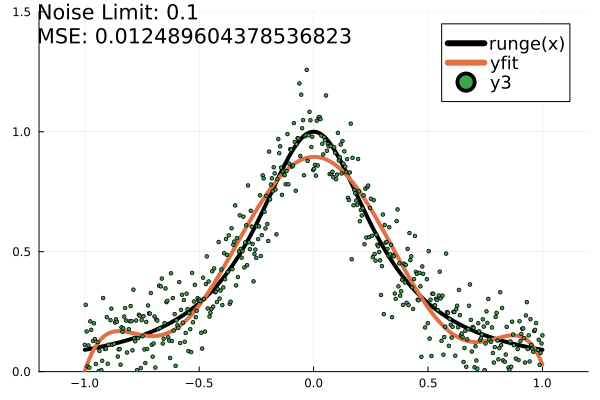

In [40]:
using LinearAlgebra
using Plots
using Statistics
default(linewidth=4, legendfontsize=12)
@time begin
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

function vander_chebyshev(x, n=nothing)
    if isnothing(n)
        n = length(x) # Square by default
    end
    m = length(x)
    T = ones(m, n)
    if n > 1
        T[:, 2] = x
    end
    for k in 3:n
        #T[:, k] = x .* T[:, k-1]
        T[:, k] = 2 * x .* T[:,k-1] - T[:, k-2]
    end
    T
end

runge(x) = 1 / (1 + 10*x^2)

CosRange(a, b, n) = (a + b)/2 .+ (b - a)/2 * cos.(LinRange(-pi, 0, n))

vcond(mat, points, nmax) = [cond(mat(points(-1, 1, n))) for n in 2:nmax]
    
    

function chebyshev_regress_eval(x, xx, n)
    V = vander_chebyshev(x, n)
    vander_chebyshev(xx, n) / V
end

runge(x) = 1 / (1 + 10*x^2)
runge_noisy(x, sigma) = runge.(x) + randn(size(x)) * sigma

x = LinRange(-1, 1, 500)
ytrain = runge_noisy(x, 0.1)
yfit = chebyshev_regress_eval(x, x, 7) * ytrain
size(ytrain), size(yfit)

    
mse_julia = mean((yfit - ytrain).^2)
    
plot(x, runge.(x), label="runge(x)", color=:black)
plot!(x, yfit, label="yfit")
scatter!(x, ytrain, markersize=2)
#Set x-axis limits from -1.2 to 1.2
xlims!(-1.2, 1.2)

# Set y-axis limits from -2 to 2
ylims!(0, 1.5)
annotate!(-1.2,1.5,text("Noise Limit: 0.1", :left))
annotate!(-1.2,1.4,text("MSE: $mse_julia", :left))
    
end

LoadError: LoadError: MethodError: no method matching var"@time"(::LineNumberNode, ::Module)
[0mClosest candidates are:
[0m  var"@time"(::LineNumberNode, ::Module, [91m::Any[39m) at timing.jl:250
[0m  var"@time"(::LineNumberNode, ::Module, [91m::Any[39m, [91m::Any[39m) at timing.jl:255
in expression starting at In[39]:1

0.01044616423113898

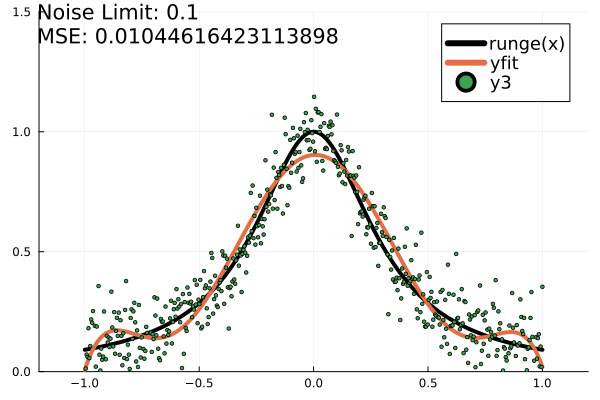

In [16]:
ytest = runge_noisy(x, 0.1)

500-element Vector{Float64}:
 -0.05368153246779861
  0.08931119650923382
  0.22592369049814606
  0.1578897941694789
  0.001205292795167956
  0.31577353421980914
  0.15883835750383607
 -0.03594385378909541
  0.15476015775522228
  0.15135011837978357
  0.17015045912833765
  0.0019456036523219367
  0.1146614774035829
  ⋮
  0.14549867533049105
 -0.0022315611300859073
 -0.08600546279086553
  0.37730804150004993
  0.09278094863832391
  0.13964727046923933
 -0.03498066280373774
  0.3316512823819892
  0.09941849102703428
  0.1860348479972379
  0.05579501942412309
  0.312708874908291

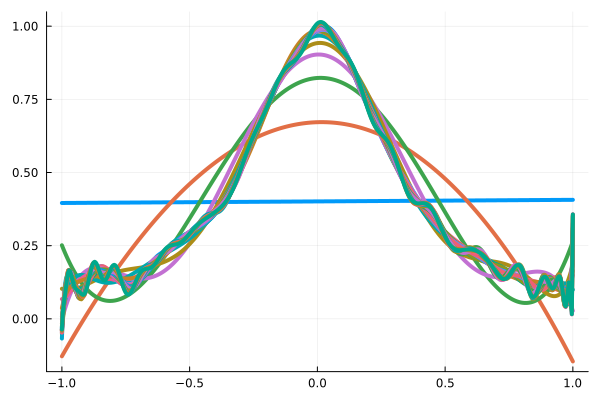

In [17]:
ks = 2:2:50
p = plot(legend=:none)
function residuals(k)
    # Fit polynomial of degree k to ytrain.
    yfit = chebyshev_regress_eval(x, x, k) * ytrain
    plot!(x, yfit, label="k=$k")
    [norm(yfit - ytrain) norm(yfit - ytest)]
end

res = vcat([residuals(k) for k in ks]...)
p

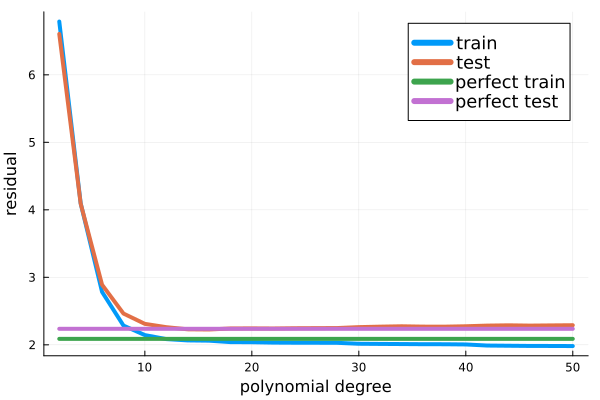

In [18]:
plot(ks, res[:,1], label="train", xlabel="polynomial degree", ylabel="residual")
plot!(ks, res[:,2], label="test")
plot!(ks, _ -> norm(runge.(x)-ytrain), label="perfect train")
plot!(ks, _ -> norm(runge.(x)-ytest), label="perfect test")

0.01044616423113898

In [18]:
#Random values could be messing with ghe RMSE 
# using set linespace from -1, 1 seems to have got them closer but there is still a difference between
#Juila and Python 